In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Projects/Weather_Data_Analysis/Weather Data.csv')

In [6]:
# Display basic information about the data
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [7]:
# Display basic statistics of the data
print("\nData Statistics:")
print(data.describe().transpose())


Data Statistics:
                   count        mean        std    min     25%     50%  \
Temp_C            8784.0    8.798144  11.687883 -23.30    0.10    9.30   
Dew Point Temp_C  8784.0    2.555294  10.883072 -28.50   -5.90    3.30   
Rel Hum_%         8784.0   67.431694  16.918881  18.00   56.00   68.00   
Wind Speed_km/h   8784.0   14.945469   8.688696   0.00    9.00   13.00   
Visibility_km     8784.0   27.664447  12.622688   0.20   24.10   25.00   
Press_kPa         8784.0  101.051623   0.844005  97.52  100.56  101.07   

                     75%     max  
Temp_C             18.80   33.00  
Dew Point Temp_C   11.80   24.40  
Rel Hum_%          81.00  100.00  
Wind Speed_km/h    20.00   83.00  
Visibility_km      25.00   48.30  
Press_kPa         101.59  103.65  


In [8]:
# Renaming columns for consistency
data.rename(columns={'Rel Hum_%': 'Humidity', 'Weather': 'Weather_condition'}, inplace=True)

**Exploratory Data Analysis**

In [9]:
# Data Exploration
print("\nNumber of unique values in each column:")
print(data.nunique())
print("\nUnique weather conditions:")
print(data['Weather_condition'].unique())


Number of unique values in each column:
Date/Time            8784
Temp_C                533
Dew Point Temp_C      489
Humidity               83
Wind Speed_km/h        34
Visibility_km          24
Press_kPa             518
Weather_condition      50
dtype: int64

Unique weather conditions:
['Fog' 'Freezing Drizzle,Fog' 'Mostly Cloudy' 'Cloudy' 'Rain'
 'Rain Showers' 'Mainly Clear' 'Snow Showers' 'Snow' 'Clear'
 'Freezing Rain,Fog' 'Freezing Rain' 'Freezing Drizzle' 'Rain,Snow'
 'Moderate Snow' 'Freezing Drizzle,Snow' 'Freezing Rain,Snow Grains'
 'Snow,Blowing Snow' 'Freezing Fog' 'Haze' 'Rain,Fog' 'Drizzle,Fog'
 'Drizzle' 'Freezing Drizzle,Haze' 'Freezing Rain,Haze' 'Snow,Haze'
 'Snow,Fog' 'Snow,Ice Pellets' 'Rain,Haze' 'Thunderstorms,Rain'
 'Thunderstorms,Rain Showers' 'Thunderstorms,Heavy Rain Showers'
 'Thunderstorms,Rain Showers,Fog' 'Thunderstorms' 'Thunderstorms,Rain,Fog'
 'Thunderstorms,Moderate Rain Showers,Fog' 'Rain Showers,Fog'
 'Rain Showers,Snow Showers' 'Snow Pellets' 'Rai

In [10]:
# Count of each weather condition
print("\nCount of each weather condition:")
print(data['Weather_condition'].value_counts())


Count of each weather condition:
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezi

In [11]:
# Show all records where weather condition is 'Clear'
print("\nRecords where Weather Condition is Clear:")
print(data[data['Weather_condition'] == 'Clear'])


Records where Weather Condition is Clear:
             Date/Time  Temp_C  Dew Point Temp_C  Humidity  Wind Speed_km/h  \
67      1/3/2012 19:00   -16.9             -24.8        50               24   
114     1/5/2012 18:00    -7.1             -14.4        56               11   
115     1/5/2012 19:00    -9.2             -15.4        61                7   
116     1/5/2012 20:00    -9.8             -15.7        62                9   
117     1/5/2012 21:00    -9.0             -14.8        63               13   
...                ...     ...               ...       ...              ...   
8646   12/26/2012 6:00   -13.4             -14.8        89                4   
8698  12/28/2012 10:00    -6.1              -8.6        82               19   
8713   12/29/2012 1:00   -11.9             -13.6        87               11   
8714   12/29/2012 2:00   -11.8             -13.1        90               13   
8756  12/30/2012 20:00   -13.8             -16.5        80               24   

      Vi

**Data Visualisation**

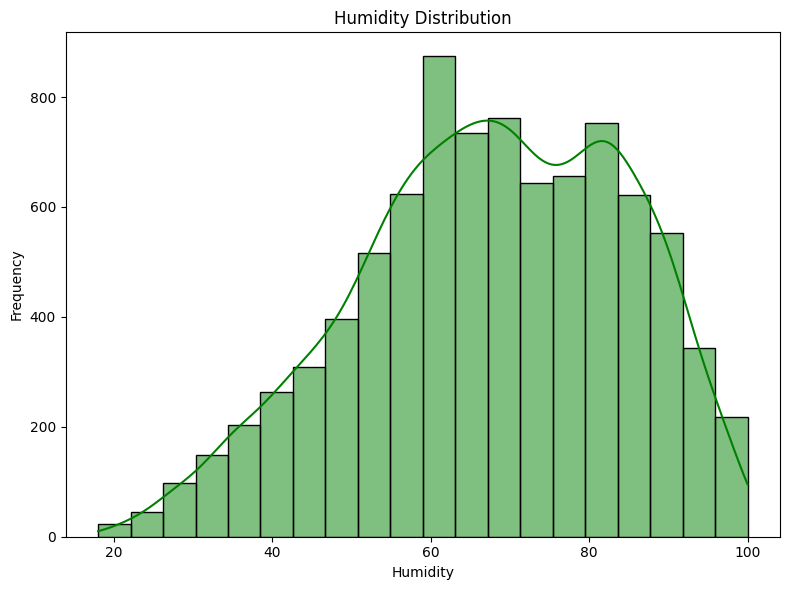

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Humidity'], bins=20, color='green', kde=True)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

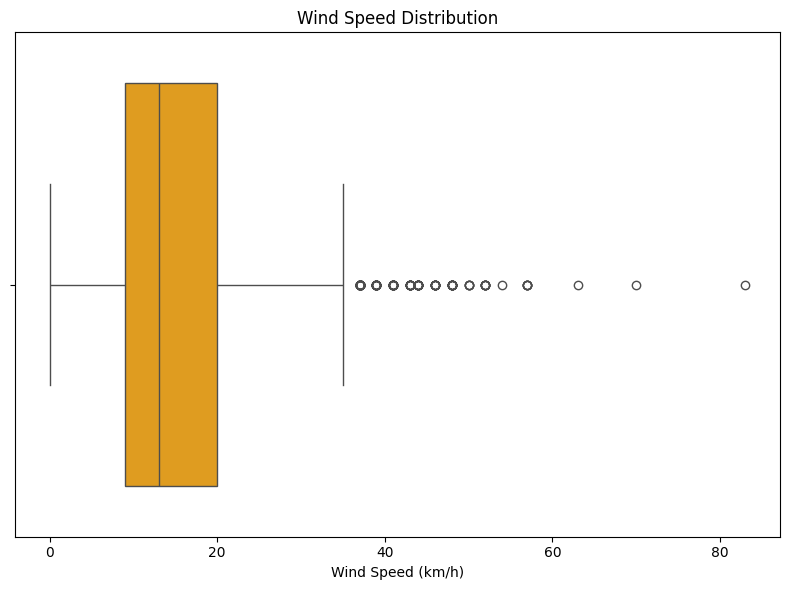

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Wind Speed_km/h'], color='orange')
plt.xlabel('Wind Speed (km/h)')
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

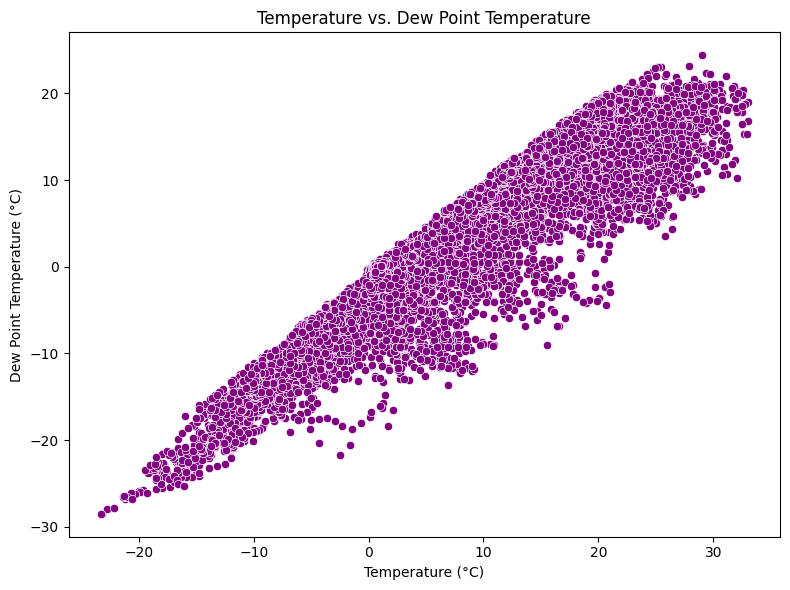

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=data, color='purple')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dew Point Temperature (°C)')
plt.title('Temperature vs. Dew Point Temperature')
plt.tight_layout()
plt.show()

<ipython-input-15-4740d0427e53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather_condition', data=data, palette='viridis')


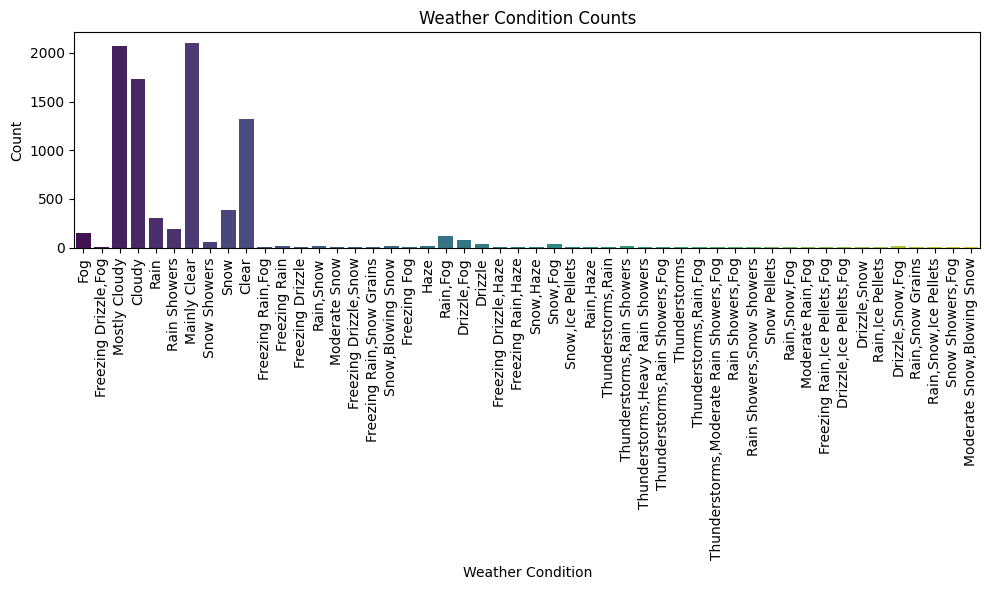

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_condition', data=data, palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Time-Based Analysis**

In [16]:
# Convert 'Date/Time' column to datetime format
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [17]:
# Extract and create new columns for Year, Month, Day, and Hour
data['Year'] = data['Date/Time'].dt.year
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['Hour'] = data['Date/Time'].dt.hour

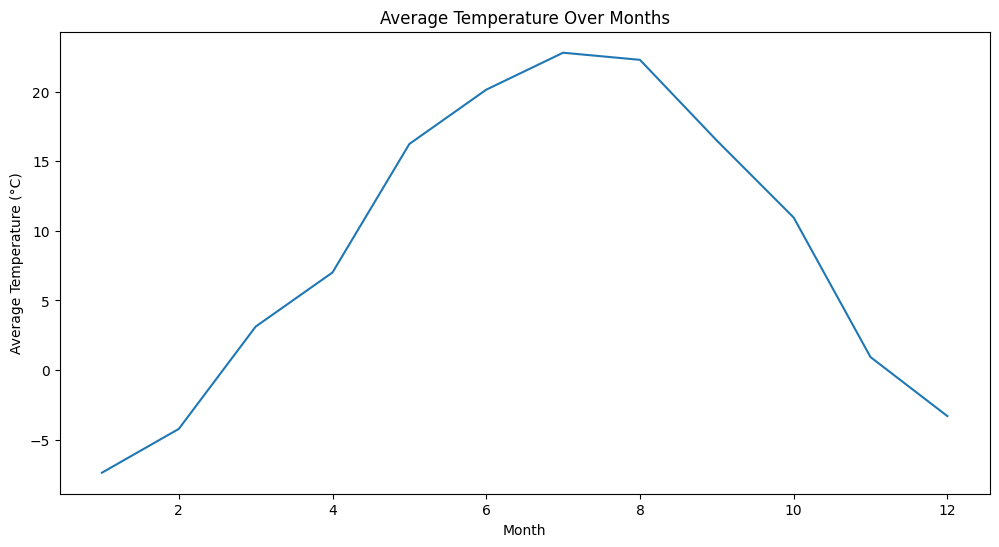

In [20]:
# Plot average temperature over months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temp_C', data=data.groupby('Month')['Temp_C'].mean().reset_index())
plt.title('Average Temperature Over Months')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

#This plot can provide insights into the seasonal variations in temperature.It shows higher temperatures in summer months and lower temperatures in winter months.

**Correlation Analysis**

In [22]:
# Check the actual column names in the DataFrame
print(data.columns)

# Make sure the column name is correct and without leading/trailing whitespaces
column_name = 'Weather_condition'
if column_name in data.columns:
    data_encoded = pd.get_dummies(data, columns=[column_name])
    correlation_matrix = data_encoded.corr()
    print(correlation_matrix)
else:
    print(f"Column '{column_name}' not found in the DataFrame.")

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Humidity',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather_condition',
       'Year', 'Month', 'Day', 'Hour'],
      dtype='object')
                                                      Temp_C  \
Temp_C                                              1.000000   
Dew Point Temp_C                                    0.932714   
Humidity                                           -0.220182   
Wind Speed_km/h                                    -0.061876   
Visibility_km                                       0.273455   
Press_kPa                                          -0.236389   
Year                                                     NaN   
Month                                               0.218048   
Day                                                 0.009300   
Hour                                                0.106888   
Weather_condition_Clear                            -0.071162   
Weather_condition_Cloudy       

<ipython-input-22-0167b423f396>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


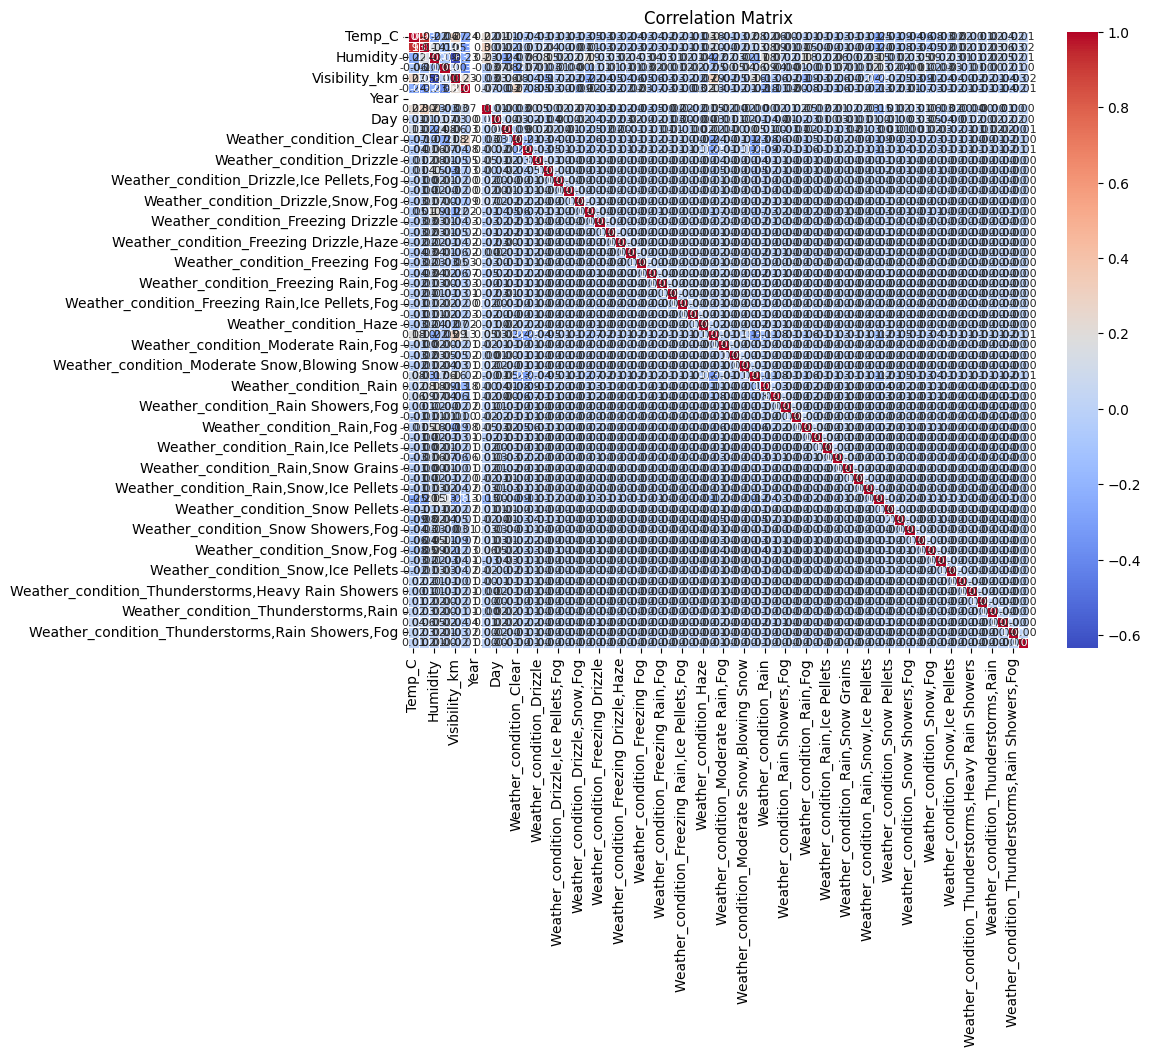

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

#The correlation matrix can help identify relationships between different weather variables.

**Wind Speed Analysis**

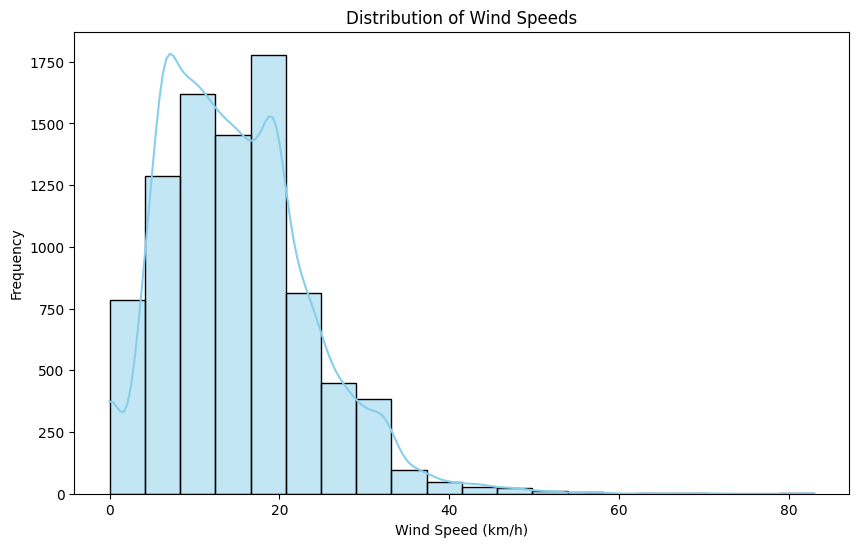

In [27]:
# Plot a histogram of wind speeds
plt.figure(figsize=(10, 6))
sns.histplot(data['Wind Speed_km/h'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

#The histogram of wind speeds provides an overview of the frequency of different wind speeds. It shows the most of the time the wind speed is nearer to 20km/h.

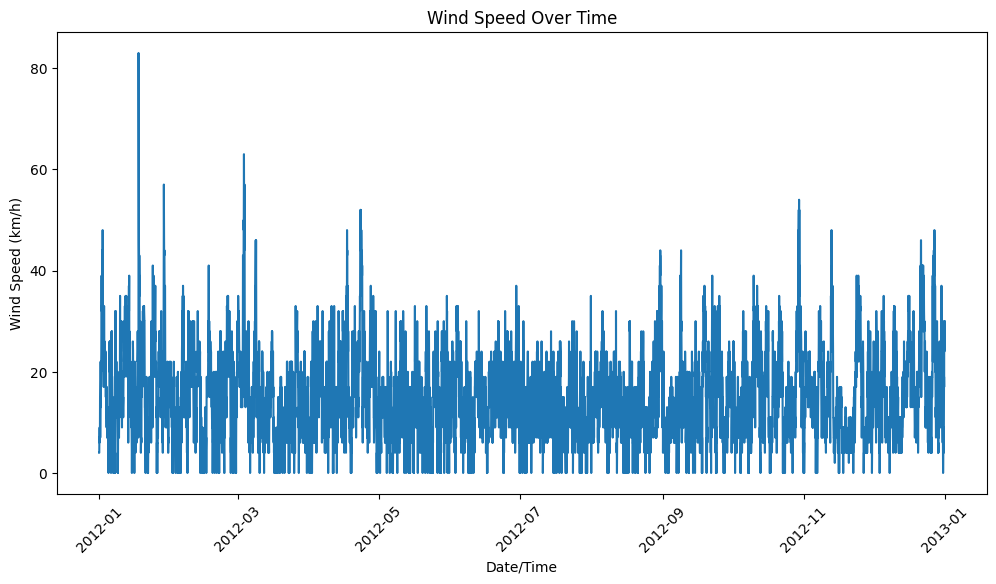

In [28]:
# Plot wind speed over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Wind Speed_km/h', data=data)
plt.title('Wind Speed Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(rotation=45)
plt.show()

#The line plot of wind speed over time can reveal trends or patterns in wind behavior. Sudden spikes in wind speed indicate storms or turbulent weather periods.

**Conclusion: Insights from Weather Data Analysis**

In summary, the exploratory data analysis (EDA) conducted on the weather dataset has revealed significant insights into atmospheric conditions during the observed period. Through a combination of statistical measures and visualizations, we've gained a deeper understanding of various meteorological parameters.

**Key Findings:**

*Temporal Patterns:*

Analysis of temperature variations across months unveiled distinct seasonal patterns, indicating higher temperatures in summer and lower temperatures in winter.
Day-to-day variations displayed fluctuations in temperature, humidity, and other factors, contributing to the dynamic nature of weather conditions.

*Correlation Among Variables:*

Correlation analysis highlighted meaningful relationships between different meteorological parameters. Notably, a positive correlation between temperature and humidity was observed.
The correlation matrix provided valuable insights into how changes in one variable may influence others, contributing to a more holistic understanding of weather dynamics.

*Wind Speed Distribution:*

Examination of wind speed distribution showed the prevalence of calm conditions, with occasional spikes during specific periods.
These findings are crucial for understanding the frequency and intensity of wind events, impacting sectors such as energy production and transportation.

*Weather Condition Categorization:*

Categorizing weather conditions enabled the identification of the frequency and duration of specific atmospheric states, including clear skies, snowy conditions, and foggy weather.
This categorization enhances our ability to anticipate and prepare for specific weather phenomena, contributing to improved decision-making.

*Implications and Applications:*

Insights from this analysis have implications for various applications, including urban planning, agriculture, and emergency management.
Understanding temporal and spatial patterns of weather conditions is crucial for making informed decisions across different sectors.

*Limitations and Further Research:*

Acknowledging the limitations, including potential biases in the dataset and the impact of localized weather phenomena, is essential.
Future research may involve integrating additional datasets and employing advanced modeling techniques for more accurate predictions.



---



In conclusion, our EDA provides a comprehensive overview of observed weather data, offering valuable insights that contribute to a better understanding of atmospheric dynamics. These findings can serve as a foundation for more targeted and in-depth analyses, driving advancements in weather prediction and the development of strategies for mitigating the impacts of extreme weather events.